In [5]:
import pandas as pd
bikes=pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
probability_over_4000=len(bikes[bikes['cnt']>4000])/len(bikes)


0.6183310533515732

In [9]:
import math
def find_outcome_combinations(N, k):
    # Calculate the numerator of our formula.
    numerator = math.factorial(N)
    # Calculate the denominator.
    denominator = math.factorial(k) * math.factorial(N - k)
    # Divide them to get the final value.
    return numerator / denominator
##Find the number of combinations where 8 days out of 10 have more than 4000 rentals. 
combinations_8=find_outcome_combinations(10,8)
###Find the number of combinations where 9 days out of 10 have more than 4000 rentals
combinations_9=find_outcome_combinations(10,9)


In [12]:
p=0.6
q=0.4
import math
def prob_combination(n,k):
    no_of_combinations=math.factorial(n)/(math.factorial(n-k)*math.factorial(k))
    probabilty=(p**k)*(q**(n-k))
    return probabilty*no_of_combinations
prob_8=prob_combination(10,8)
prob_8

0.12093235199999997

In [18]:
prob_over_5000=len(bikes[bikes['cnt']>5000])/len(bikes)
prob_over_5000

0.3912448700410397

In [30]:
### Create a list of probabilities(a distribution,eg in this case it a binomial distrivution) that will have more than 5000 riders combinations for next 30 days
p=0.39
q=1-p
outcome_probs=[]
import math
def prob_combination(n,k):
    no_of_combinations=math.factorial(n)/(math.factorial(n-k)*math.factorial(k))
    probabilty=(p**k)*(q**(n-k))
    return probabilty*no_of_combinations
sample=range(0,31)
for i in sample:
    probability=prob_combination(30,i)
    outcome_probs.append(probability)



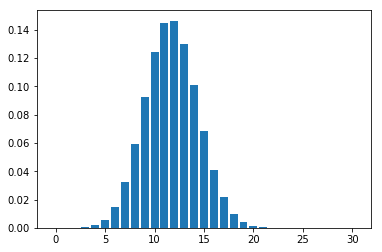

In [37]:
###Creating binomial distribution with scipy
import scipy
import matplotlib.pyplot as plt
from scipy.stats import binom
outcome_range=range(0,31)
dist=binom.pmf(outcome_range,30,0.39)
fig,ax=plt.subplots()
ax.bar(outcome_range,dist)
plt.show()

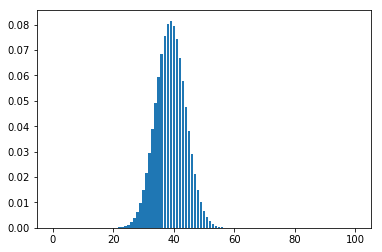

In [41]:
### Affect of increase of N
outcome_range=range(0,101)
dist=binom.pmf(outcome_range,100,0.39)
fig,ax=plt.subplots()
ax.bar(outcome_range,dist)
plt.show()


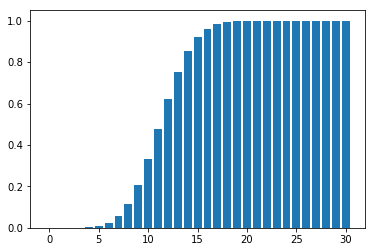

In [44]:
###Cumulative distribution function 
outcome_range=range(0,31)
dist=binom.cdf(outcome_range,30,0.39)
fig,ax=plt.subplots()
ax.bar(outcome_range,dist)
plt.show()


In [52]:
#### Probability of 16 or less days with 5000 riders and probability of more than 16 days of 5000 riders

left_16=dist[16]
right_16=1-left_16
left_16

0.96230037660548828

In [62]:
li1=[6662,1179,15128,9592]
li2=[5249.8,2597.4,16533.5,8180.3]
chisq_gender_income=0
for i in range(0,len(li1)):
    sqdiff=((li1[i]-li2[i])**2)/li2[i]
    chisq_gender_income=chisq_gender_income+sqdiff
chisq_gender_income

1517.5510981525103